# Assembling methods into single dataset

Notes: - Includes data from 1st March 2020 - 31st March 2021

In [6]:
# Importing Libraries
import import_ipynb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from importlib import reload

import NI_M1
import NI_M2
reload(NI_M1)
reload(NI_M2)


importing Jupyter notebook from NI_M1.ipynb
importing Jupyter notebook from NI_M2.ipynb
importing Jupyter notebook from NI_M1.ipynb
importing Jupyter notebook from NI_M2.ipynb


<module 'NI_M2' from 'NI_M2.ipynb'>

# Importing method files

In [7]:

ReadCSV = True

# Optional: csv files
if ReadCSV:
    df_M1_ini = pd.read_csv(r'O:\GIRFT DiRAC\FlavienHardy\2_NosocomialInfections\src\0.processing\data\NI_M1.csv')
    df_M2_ini = pd.read_csv(r'O:\GIRFT DiRAC\FlavienHardy\2_NosocomialInfections\src\0.processing\data\NI_M2.csv')


C:\Users\flavien.hardy\OneDrive - NHS Improvement\Desktop\FH_Local\env\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Setting lower bound for discharge date

In [8]:

df_M1 = df_M1_ini
df_M2 = df_M2_ini

Dates = ['Admission_date', 'Discharge_date']
for dates in Dates:
    df_M1.loc[dates] = pd.to_datetime(df_M1[dates])
    df_M2.loc[dates] = pd.to_datetime(df_M2[dates])

DateLim = '2020-03-01'
FilterDate = df_M1['Discharge_date'] >= DateLim
df_M1 = df_M1[FilterDate]
FilterDate = df_M2['Discharge_date'] >= DateLim
df_M2 = df_M2[FilterDate]

print(df_M1_ini.shape)
print(df_M1.shape)
print(df_M2_ini.shape)
print(df_M2.shape)



(374246, 17)
(374244, 17)
(486306, 10)
(486232, 10)


## Assembling datasets 1 and 2

In [9]:

# M1: from LASTEST UNIQUE episodes
ColumnList = ['P_Spell_ID', 'HESID', 'Admission_date', 'NC_Method1']
df_M1_Sub = df_M1[ColumnList]
# M2: from ALL episodes
ColumnList = ['P_Spell_ID', 'HESID', 'Admission_date', 'EPIstart', 'Discharge_date', 'Diff_EPIstart_Admission', 'NC_Method2_15', 'NC_Method2_8']
df_M2_Sub = df_M2[ColumnList]

# Merging on P_Spell_ID
ColumnMerge = ['P_Spell_ID']
df_M12 = pd.merge(df_M1_Sub, df_M2_Sub, how='left', left_on=ColumnMerge, right_on=ColumnMerge)
df_M12 = df_M12.drop(columns=['HESID_y', 'Admission_date_y']).rename(columns={'HESID_x':'HESID', 'Admission_date_x':'Admission_date'})
df_M12['Admission_date'] = pd.to_datetime(df_M12['Admission_date'])

print('Size of dataset:', df_M12.shape)
df_M12.head(2)


Size of dataset: (374244, 9)


,P_Spell_ID,HESID,Admission_date,NC_Method1,EPIstart,Discharge_date,Diff_EPIstart_Admission,NC_Method2_15,NC_Method2_8
0,1487000,01B56B98137DE12EE38B34EADA7E71DB,2021-02-05,0,2021-03-22,2021-03-31,45,1,1
1,2169012,028370D13668ED4A6578A3F5D6C1431E,2021-03-24,0,2021-03-24,2021-03-31,0,0,0


In [10]:

# Check how many infections are in M2 but NOT in M1
print('Number of infections in M2 but NOT in M1:', df_M12[df_M12['NC_Method1'].isnull()].shape[0])
print('Out of', df_M12.shape[0], 'infections total.')
print('Filling these NaNs with 0...')

FilterNan = df_M12['NC_Method1'].isnull()
df_M12.loc[FilterNan, 'NC_Method1'] = 0

print('Positions of remaining NaNs:')
df_M12.isnull().any()


Number of infections in M2 but NOT in M1: 0
Out of 374244 infections total.
Filling these NaNs with 0...
Positions of remaining NaNs:


P_Spell_ID                 False
HESID                      False
Admission_date             False
NC_Method1                 False
EPIstart                   False
Discharge_date             False
Diff_EPIstart_Admission    False
NC_Method2_15              False
NC_Method2_8               False
dtype: bool

## Assembling dataset M4

In [13]:

# Importing File
ReadExcel = True
if ReadExcel:
    df_M4 = pd.read_excel(r'O:\GIRFT DiRAC\FlavienHardy\0_Datasets_Ini\06.22\Z208 21-06-21.xlsx')


In [14]:

# Extracting columns of interest
df_M4['NC_Method4'] = 1
ColumnList = ['P_Spell_ID', 'NC_Method4']
df_M4_Sub = df_M4[ColumnList]

# Merging with M12 dataset
ColumnMerge = ['P_Spell_ID']
df_M124 = pd.merge(df_M12, df_M4_Sub,  how='left', left_on=ColumnMerge, right_on=ColumnMerge)

# Fill NaNs in M4 with 0
df_M124['NC_Method4'] = df_M124['NC_Method4'].fillna(0).astype('int')
df_M124.head()


,P_Spell_ID,HESID,Admission_date,NC_Method1,EPIstart,Discharge_date,Diff_EPIstart_Admission,NC_Method2_15,NC_Method2_8,NC_Method4
0,1487000,01B56B98137DE12EE38B34EADA7E71DB,2021-02-05,0,2021-03-22,2021-03-31,45,1,1,0
1,2169012,028370D13668ED4A6578A3F5D6C1431E,2021-03-24,0,2021-03-24,2021-03-31,0,0,0,0
2,2201273,028DA1F0589BFB5BDB1F37500A7D9840,2020-12-31,0,2020-12-31,2021-03-31,0,0,0,0
3,2947750,036C96D13FF931CD1EFEB11B4FD3A01B,2021-03-22,0,2021-03-22,2021-03-31,0,0,0,0
4,3445944,04017C157149BE49748AC2B40C628572,2021-02-04,1,2021-02-15,2021-03-31,11,0,1,0


## Printing characteristics

In [15]:

# Add final column for identified NI
FilterNI = (df_M124['NC_Method1'] + df_M124['NC_Method2_15'] + df_M124['NC_Method2_8'] + df_M124['NC_Method4']> 0)
df_M124['NC_124'] = np.where(FilterNI, 1, 0)

print('Size of dataset:', df_M124.shape)

# Rearranging columns
ColumnList = ['P_Spell_ID', 'HESID', 'Admission_date', 'Discharge_date', 'EPIstart', 'Diff_EPIstart_Admission',
               'NC_Method1', 'NC_Method2_15', 'NC_Method2_8', 'NC_Method4', 'NC_124']

df_M124 = df_M124[ColumnList]
df_M124.head(2)


Size of dataset: (374244, 11)


,P_Spell_ID,HESID,Admission_date,Discharge_date,EPIstart,Diff_EPIstart_Admission,NC_Method1,NC_Method2_15,NC_Method2_8,NC_Method4,NC_124
0,1487000,01B56B98137DE12EE38B34EADA7E71DB,2021-02-05,2021-03-31,2021-03-22,45,0,1,1,0,1
1,2169012,028370D13668ED4A6578A3F5D6C1431E,2021-03-24,2021-03-31,2021-03-24,0,0,0,0,0,0


In [16]:

# Counts
NI_Sum = df_M124['NC_124'].sum()
M1_Sum = df_M124['NC_Method1'].sum()
M2_15_Sum = df_M124['NC_Method2_15'].sum()
M2_8_Sum = df_M124['NC_Method2_8'].sum()
M4_Sum = df_M124['NC_Method4'].sum()
print('Total number of NI identified:', NI_Sum, ', out of', df_M12.shape[0])
print('Number of NI identified using M1:', M1_Sum)
print('Number of NI identified using M2-15:', M2_15_Sum)
print('Number of NI identified using M2-8:', M2_8_Sum)
print('Number of NI identified using M4:', M4_Sum)
print('--------------------')

# Identifications by sole methods
Filter_M1 = (df_M124['NC_Method1'] == 1) & (df_M124['NC_Method1'] + df_M124['NC_Method2_15'] + df_M124['NC_Method2_8'] == 1)
print('Method 1 ONLY:', df_M124[Filter_M1].shape[0])
Filter_M215 = (df_M124['NC_Method2_15'] == 1) & (df_M124['NC_124'] == 0)
print('Method 2.15 but NOT Method 1:', df_M124[Filter_M215].shape[0])
Filter_M28 = (df_M124['NC_Method2_8'] == 1) & (df_M124['NC_Method1'] + df_M124['NC_Method2_15'] + df_M124['NC_Method2_8'] == 1)
print('Method 2.8 ONLY:', df_M124[Filter_M28].shape[0])
Filter_M4 = (df_M124['NC_Method4'] == 1) & (df_M124['NC_124'] == 1)
print('Method 4 ONLY:', df_M124[Filter_M4].shape[0])
print('--------------------')

# Intersections
Filter_Intersect_1p25 = (df_M124['NC_Method1'] + df_M124['NC_Method2_15'] == 2)
print('Identification by BOTH M1 and M2.15:', df_M124[Filter_Intersect_1p25].shape[0])
Filter_Intersect_1p28 = (df_M124['NC_Method1'] + df_M124['NC_Method2_8'] == 2)
print('Identification by BOTH M1 and M2.8:', df_M124[Filter_Intersect_1p28].shape[0])
print('--------------------')

# Proportions
Filter_Union = (df_M124['NC_Method1'] + df_M124['NC_Method2_15'] + df_M124['NC_Method2_8'] > 0)
print('Proportion of NI using three methods:', 100*df_M124[Filter_Union].shape[0] / df_M124.shape[0], '%')


Total number of NI identified: 29896 , out of 374244
Number of NI identified using M1: 18208
Number of NI identified using M2-15: 7519
Number of NI identified using M2-8: 15235
Number of NI identified using M4: 160
--------------------
Method 1 ONLY: 14535
Method 2.15 but NOT Method 1: 0
Method 2.8 ONLY: 5980
Method 4 ONLY: 160
--------------------
Identification by BOTH M1 and M2.15: 1937
Identification by BOTH M1 and M2.8: 3673
--------------------
Proportion of NI using three methods: 7.954703348617479 %


## Merging with patient characteristics

In [17]:

# Open UniquePatient dataset
ReadCSV = True
path = r'O:\GIRFT DiRAC\FlavienHardy\2_NosocomialInfections\Data\0_Raw\MarchData\FINAL unique patients (Mar-Mar) 04-06-21.xlsx'
if ReadCSV:
    df_UniquePatients = pd.read_excel(r'O:\GIRFT DiRAC\FlavienHardy\2_NosocomialInfections\Data\0_Raw\MarchData\FINAL unique patients (Mar-Mar) 04-06-21.xlsx')
    

In [18]:


df_UniquePatients = NI_M1.PreProcessing(df_UniquePatients)

ColumnList = ['P_Spell_ID', 'Diff_EPIstart_Admission', 'NC_Method1', 'NC_Method2_15', 'NC_Method2_8', 'NC_Method4', 'NC_124']
df_M124_Sub = df_M124[ColumnList]
df_M124_Sub.head(2)

ColumnMerge = ['P_Spell_ID']
df_Merged = pd.merge(df_UniquePatients, df_M124_Sub, how='left', left_on=ColumnMerge, right_on=ColumnMerge)

print('Size of dataset', df_Merged.shape)
df_Merged.head()


Size of dataset (374244, 84)


,P_Spell_ID,IMD_score,IMD_decile,IMD_quintile,Ethnicity_updated,ethnicity_updated_cat,Epikey,period,procedure_group,sex,...,livercoded,HIV,Charlson_Score,Obesity,Diff_EPIstart_Admission,NC_Method1,NC_Method2_15,NC_Method2_8,NC_Method4,NC_124
0,1487000,NaN,NaN,NaN,British,White,700778456493,FY2020-21,S353~Z504~Z943~Y588~Z504~Z943~-1~-1~-1~-1~-1~-...,Male,...,1,0,1,0,45,0,1,1,0,1
1,2169012,9.970,8.0,4.0,British,White,700783081649,FY2020-21,-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-...,Female,...,0,0,1,1,0,0,0,0,0,0
2,2201273,2.314,10.0,5.0,British,White,700776026357,FY2020-21,W461~Z943~U212~Y982~Z924~Z401~U051~Y981~-1~-1~...,Male,...,0,0,4,0,0,0,0,0,0,0
3,2947750,11.831,7.0,4.0,British,White,700777236092,FY2020-21,-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-...,Female,...,0,0,0,0,0,0,0,0,0,0
4,3445944,30.350,3.0,2.0,British,White,700788240944,FY2020-21,U212~Y981~Z411~Z941~Z413~Z941~Z421~X403~X404~X...,Male,...,0,0,4,0,11,1,0,1,0,1


In [19]:

# Adding final column for NI identification
df_Merged = df_Merged.rename(columns={'NC_124':'NI_AllMethods'})
df_Merged.head(2)


,P_Spell_ID,IMD_score,IMD_decile,IMD_quintile,Ethnicity_updated,ethnicity_updated_cat,Epikey,period,procedure_group,sex,...,livercoded,HIV,Charlson_Score,Obesity,Diff_EPIstart_Admission,NC_Method1,NC_Method2_15,NC_Method2_8,NC_Method4,NI_AllMethods
0,1487000,NaN,NaN,NaN,British,White,700778456493,FY2020-21,S353~Z504~Z943~Y588~Z504~Z943~-1~-1~-1~-1~-1~-...,Male,...,1,0,1,0,45,0,1,1,0,1
1,2169012,9.97,8.0,4.0,British,White,700783081649,FY2020-21,-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-...,Female,...,0,0,1,1,0,0,0,0,0,0


In [20]:

MethodList = ['NI_AllMethods']
Method = MethodList[0]

Sum = df_Merged[Method].sum()
Count = df_Merged[Method].count()
Prop = 100*Sum/Count 
print('Number of NI:', Sum)
print('Out of total number of spells:', Count)
print('NI rate:', Prop, '%')


Number of NI: 29896
Out of total number of spells: 374244
NI rate: 7.98837122305234 %


In [58]:

Filter = df_Merged['NI_AllMethods']==1
df_Analysis = df_Merged[Filter]
ColumnList = ['inhospital_MORT_ONS']
df_Analysis[ColumnList].describe()
df_Merged['NI_AllMethods'].describe()

count    374244.000000
mean          0.079884
std           0.271113
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: NI_AllMethods, dtype: float64

In [69]:
df_Vis['Discharge_date']

0        2021-03-31
1        2021-03-31
2        2021-03-31
3        2021-03-31
4        2021-03-31
            ...    
374239   2020-03-02
374240   2020-03-02
374241   2020-03-02
374242   2020-03-01
374243   2020-03-01
Name: Discharge_date, Length: 374244, dtype: datetime64[ns]

## Visualise time evolution

In [74]:
    
df_Vis = df_Merged
Date = 'Discharge_date'
Method = 'NI_AllMethods'

from dateutil.relativedelta import relativedelta

PropList = []
StartDate_List = []
EndDate_List = []

PropList_Y95 = []

StartDate_ini = pd.to_datetime('2020-03-01')

for k in range(0, 56):
    
    Delta = relativedelta(days=7)
    StartDate = StartDate_ini + k*Delta
    EndDate = StartDate + Delta

    df_Vis[Date] =  pd.to_datetime(df_Vis[Date], format='%Y-%m-%d' )

    df_Vis['DatePeriod'] = np.where( (StartDate<=df_Vis[Date]) & (df_Vis[Date]<EndDate), 1, 0 )
    FilterDate = df_Vis['DatePeriod'] == 1 
    df_Vis[FilterDate].head()

    Sum = df_Vis[FilterDate][Method].sum()
    Count = df_Vis[FilterDate][Method].count()
    Prop = 100 * Sum / Count
    
    SumY95 = df_Vis[FilterDate]['NC_Method1'].sum()
    CountY95 = df_Vis[FilterDate]['NC_Method1'].count()
    PropY95 = 100 * SumY95 / CountY95
    PropList_Y95.append(PropY95)
    
    StartDate_List.append(StartDate)
    EndDate_List.append(EndDate)
    PropList.append(Prop)


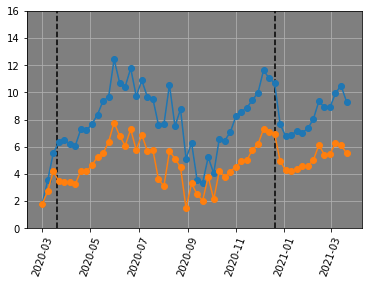

In [75]:

d = {Date:StartDate_List, 'NI_Prop':PropList,'NI_PropY95':PropList_Y95}
df = pd.DataFrame(data=d)

fig = plt.figure()
ax = plt.subplot(111)
plt.rcParams.update({'axes.facecolor':(0, 0, 0, 0.5)})
plt.plot( df[Date], df['NI_Prop'], marker='o' )
plt.plot( df[Date], df['NI_PropY95'], marker='o' )
yMax = 16
plt.ylim(0, yMax)
plt.xticks(rotation=70)
plt.vlines(x=pd.to_datetime('2020-03-20'), ymin=0, ymax=yMax, linestyles='dashed', colors='black')
plt.vlines(x=pd.to_datetime('2020-12-20'), ymin=0, ymax=yMax, linestyles='dashed', colors='black')
ax.grid(b=True)


# fig.savefig('NI_Suspected.pdf', bbox_inches='tight', format='pdf', dpi=300)
# df


## Saving Assembled Dataset

In [105]:

SaveCSV = True
path = r'O:\GIRFT DiRAC\FlavienHardy\2_NosocomialInfections\src\0.processing\data\NI_Assembled.csv'
if SaveCSV:
    df_Merged.to_csv(r'O:\GIRFT DiRAC\FlavienHardy\2_NosocomialInfections\src\0.processing\data\NI_Assembled.csv')


# On The Side

In [586]:

# ---------------------------
# Visualising NI around february-March

# FitlerDate = (df_Merged['Discharge_date']>=StartDate_List[-1]) & (df_Merged[Date]<=EndDate_List[-1])
# FilterNI = df_Merged['NC_Method1']==1
# Sum = df_Merged[FitlerDate & FilterNI].shape[0]
# Count = df_Merged[FitlerDate].shape[0]
# PropNI = 100*Sum/Count
# print(PropNI)


In [ ]:

# Unnecessary now that we link on P_Spell_ID on=left

# # Dropping repeated columns
# print('Size of dataframe BEFORE removing repeated spells:', df_M12.shape)

# # Dropping repeated spells
# ColumnList = ['HESID', 'Admission_date', 'EPIstart']
# df_M12['Admission_date'] = pd.to_datetime(df_M12['Admission_date'])
# df_M12['EPIstart'] = pd.to_datetime(df_M12['EPIstart'])
# IndexLastEpisode = df_M12[ColumnList].groupby(['HESID','Admission_date'])['EPIstart'].idxmax().values
# df_M12 = df_M12.loc[IndexLastEpisode]
# print('Size of dataframe AFTER removing repeated spells:', df_M12.shape)

# # df_M12 = df_M12.drop_duplicates(subset=['HESID', 'Admission_date'], keep='last')

# df_M12.head(2)


In [ ]:


# df_UniquePatients = NI_M1.PreProcessing(df_UniquePatients)

# ColumnMerge = ['HESID', 'Admission_date']
# # Testing merging from FINAL unique patients
# df_M1_Sub.loc[:,'Admission_date'] = pd.to_datetime(df_M1_Sub['Admission_date'])
# df_Merged = pd.merge(df_UniquePatients, df_M1_Sub, how='left', left_on=ColumnMerge, right_on=ColumnMerge)
# df_M2_Sub.loc[:,'Admission_date'] = pd.to_datetime(df_M2_Sub['Admission_date'])
# df_Merged = pd.merge(df_Merged, df_M2_Sub, how='left', left_on=ColumnMerge, right_on=ColumnMerge)

# print('Number of spells in df_UniquePatients but NOT in df_M2:', df_Merged[df_Merged['NC_Method2_15'].isnull()].shape[0])



In [ ]:


# # Filling these missing values with 0
# df_Merged.loc[:,'NC_Method2_15'] = df_Merged['NC_Method2_15'].fillna(0)
# df_Merged.loc[:,'NC_Method2_8'] = df_Merged['NC_Method2_8'].fillna(0)
# print('Number of remaining NaNs in identifying vectors:', df_Merged[df_Merged['NC_Method2_15'].isnull()].shape[0])

# # Filling new EPIstart with initial column (will be corrected later with Time Spent Before Infection)
# Filter = df_Merged['EPIstart_y'].isnull()
# df_Merged[Filter]['EPIstart_y'] = df_Merged[Filter]['EPIstart_x']

# # Dropping unwanted columns
# Columnlist = ['P_Spell_ID_y', 'P_Spell_ID', 'Discharge_date_y', 'EPIstart_x']
# df_Merged = df_Merged.drop(columns=Columnlist).rename(columns={'P_Spell_ID_x':'P_Spell_ID',
#                                                                'Discharge_date_x':'Discharge_date',
#                                                                'EPIstart_y':'EPIstart'})
# df_Merged.head(2)


In [ ]:

# # Adding final column for NI identification
# FilterNI = (df_Merged['NC_Method1']+df_Merged['NC_Method2_15']+df_Merged['NC_Method2_8']>0)
# df_Merged['NI_AllMethods'] = np.where(FilterNI, 1, 0)

# FilterNI_1p2_15 = (df_Merged['NC_Method1']+df_Merged['NC_Method2_15']>0)
# df_Merged['NI_1p2_15'] = np.where(FilterNI_1p2_15, 1, 0)
# df_Merged.head(2)
